In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("data_housing.csv")

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [7]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Price  
0       15.3  396.90   4.98   

In [9]:
# Problem Statement: Train a linear regression model to predict the price of the house

In [8]:
# :Attribute Information (in order): 
# # - CRIM per capita crime rate by town 
# # - ZN proportion of residential land zoned for lots over 25,000 sq.ft. 
# # - INDUS proportion of non-retail business acres per town 
# # - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
# # - NOX nitric oxides concentration (parts per 10 million) 
# # - RM average number of rooms per dwelling 
# # - AGE proportion of owner-occupied units built prior to 1940 
# # - DIS weighted distances to five Boston employment centres 
# # - RAD index of accessibility to radial highways 
# # - TAX full-value property-tax rate per $10,000 
# # - PTRATIO pupil-teacher ratio by town 
# # - B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town 
# # - LSTAT % lower status of the population

In [11]:
df.isnull().mean() # Checking missing values 

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Price      0.0
dtype: float64

In [ ]:
# There is no missing values if there would have been then we need to impute or process them like we did or studied in EDA.

In [12]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

In [14]:
num_cols=["CRIM","ZN","INDUS","NOX","RM","DIS","AGE","TAX","PTRATIO","B","LSTAT","Price"] # numerical column
cat_cols=["CHAS","RAD"] # categorical column

# EDA

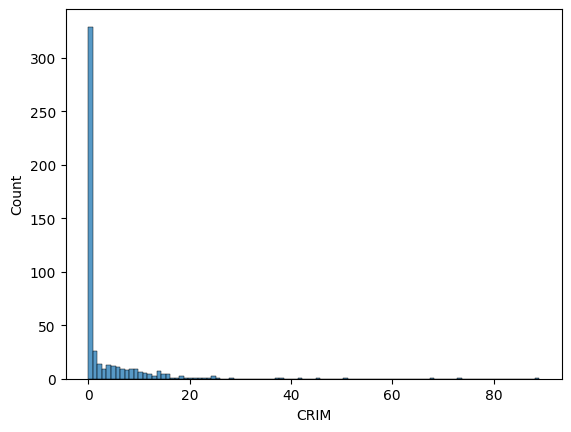

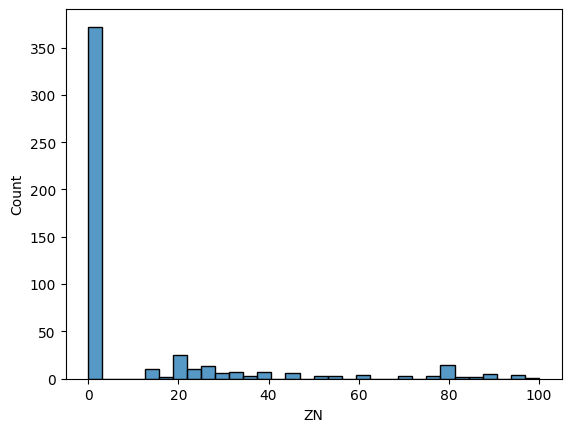

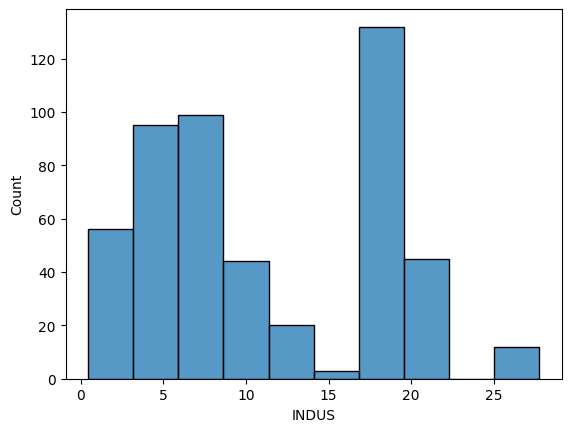

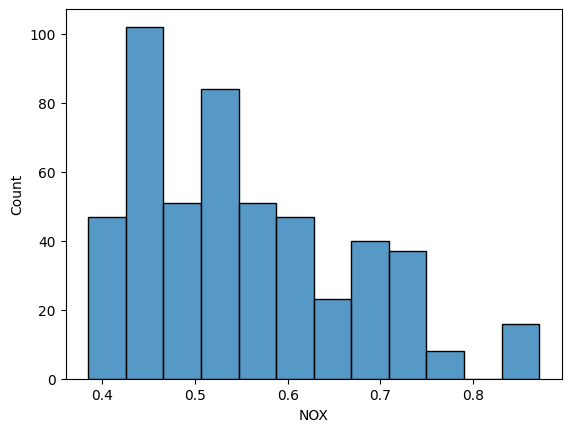

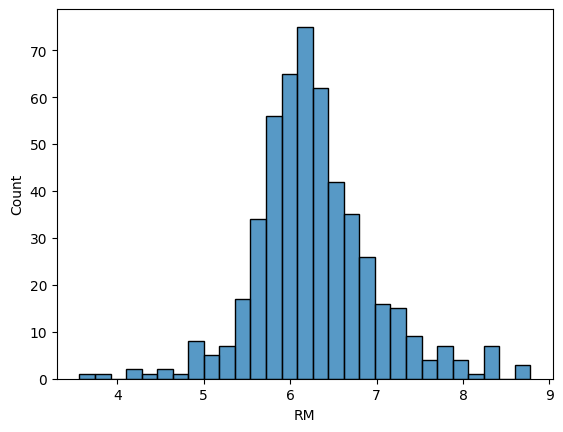

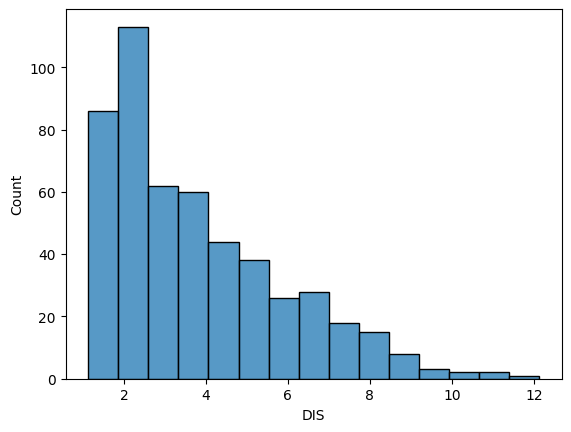

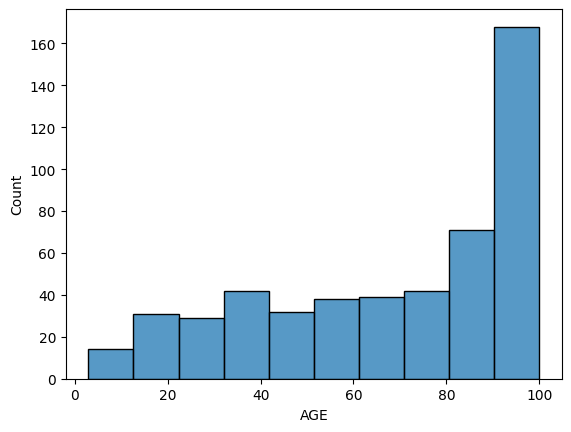

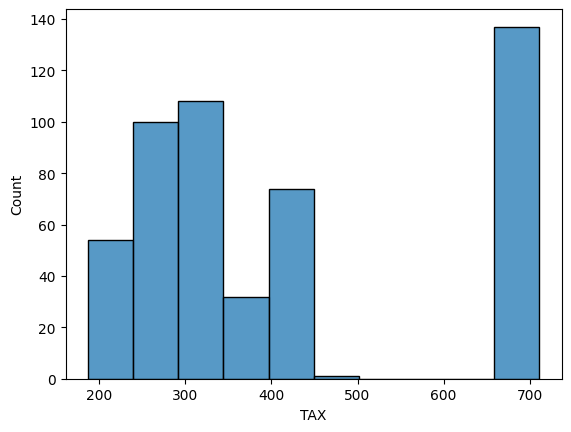

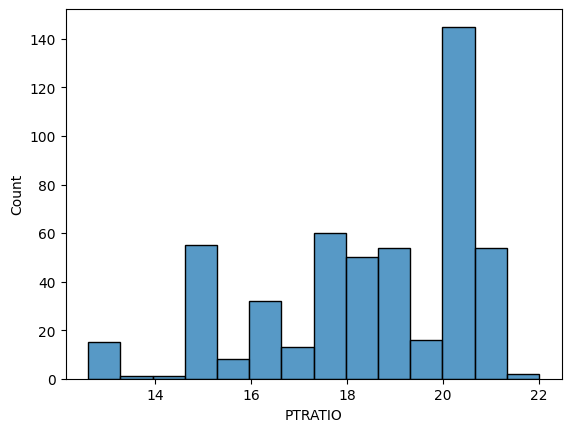

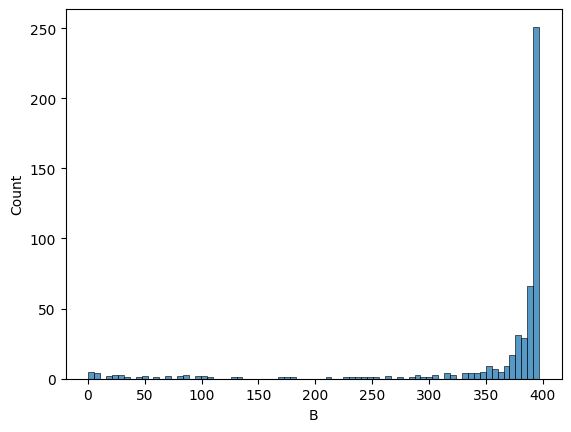

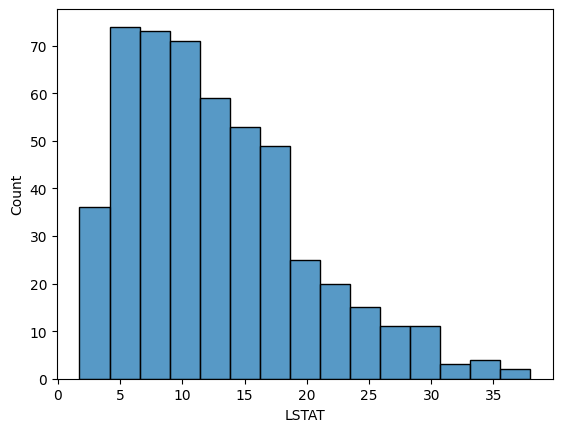

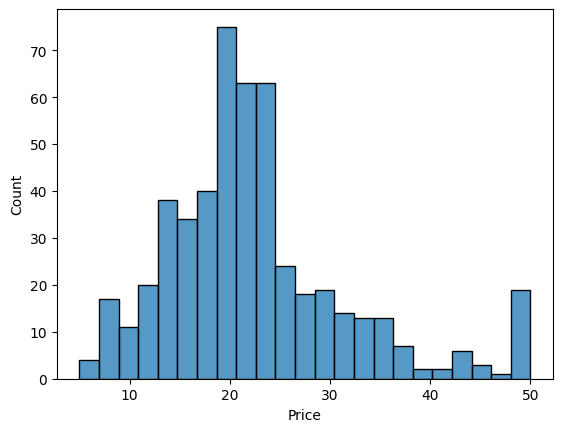

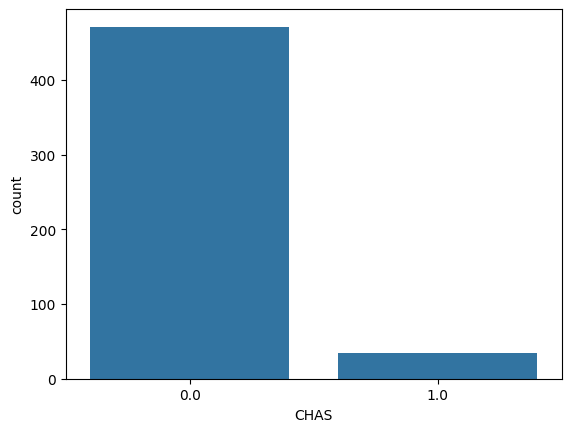

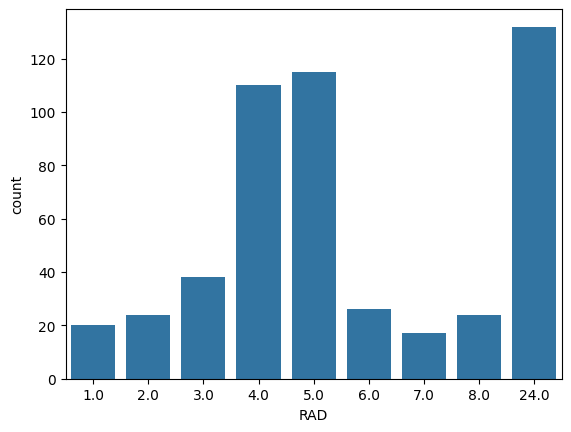

In [17]:
#Univariate Analysis 
# Univariate Analysis 
for i in num_cols: 
    sns.histplot(x=df[i]) 
    plt.show() 
for i in cat_cols: 
    sns.countplot(x=df[i]) 
    plt.show()

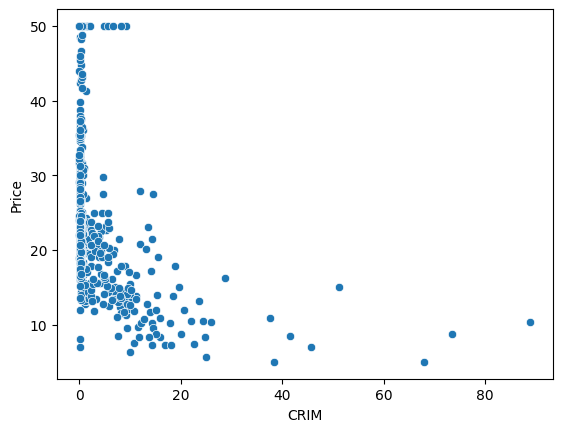

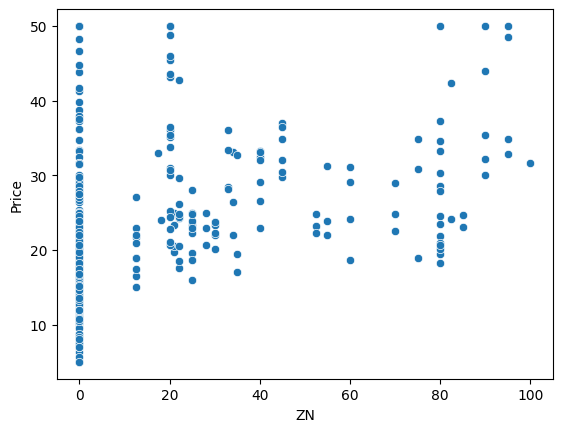

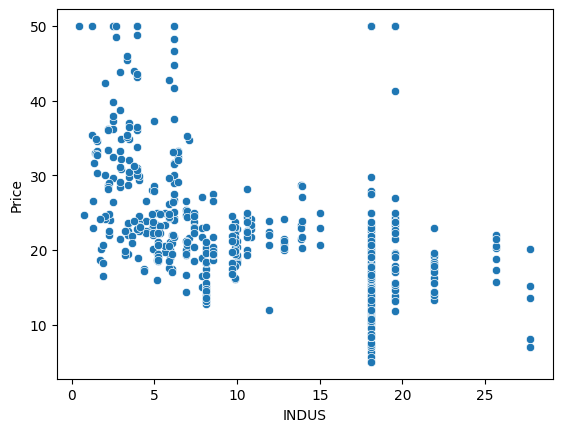

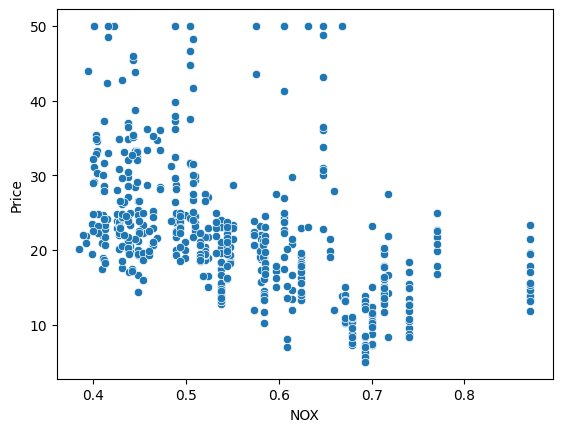

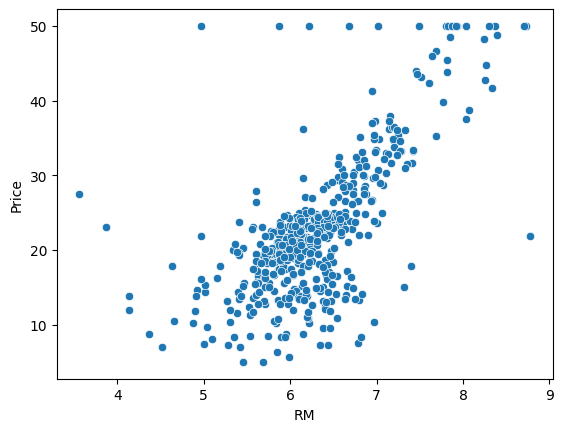

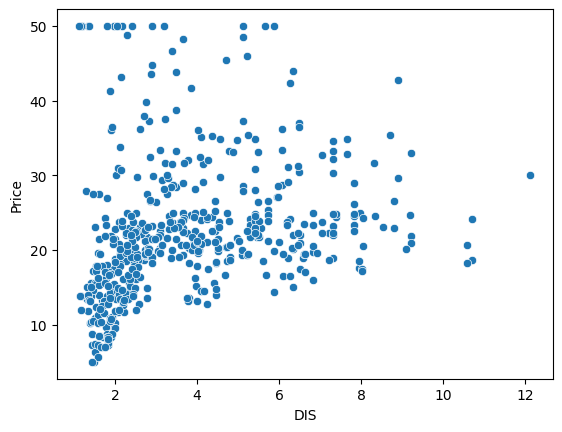

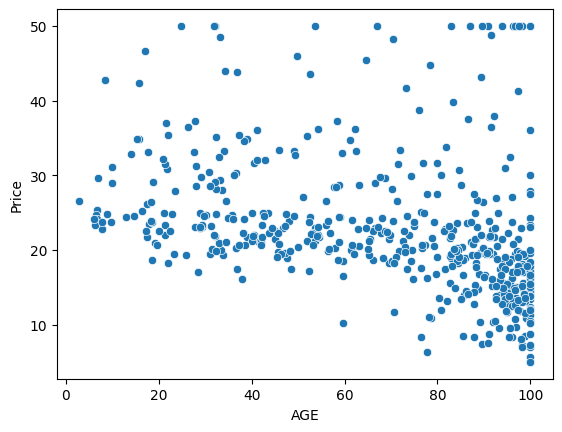

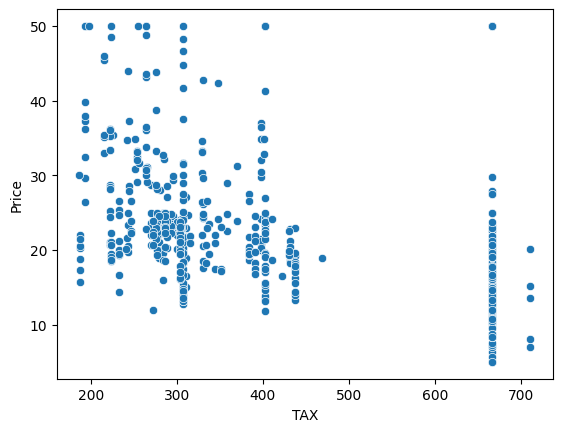

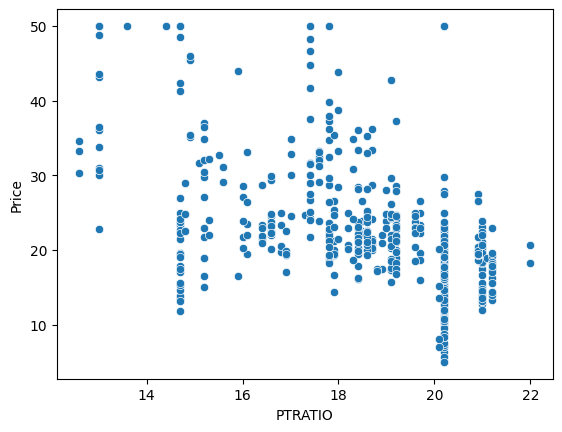

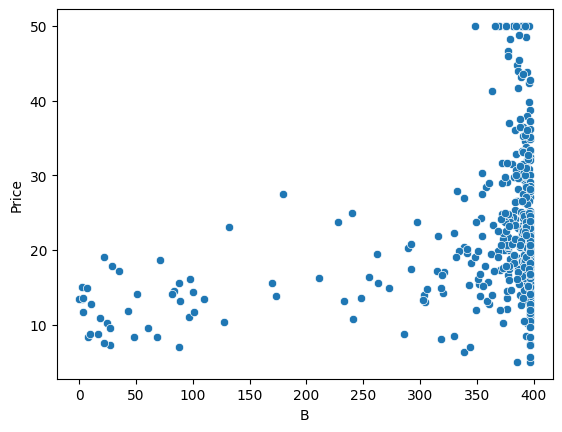

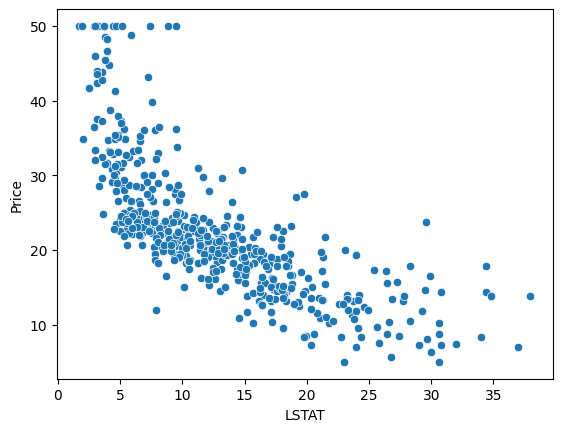

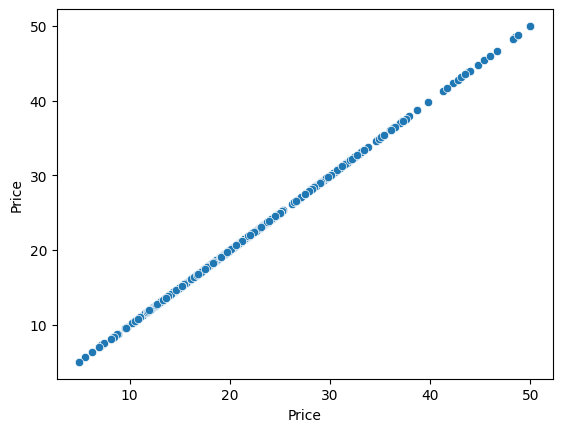

In [18]:
 
# Bivariate Analysis #
# sns.pairplot(df[num_cols]) #plt.show() 
for i in num_cols: 
    sns.scatterplot(x=df[i],y=df["Price"]) 
    plt.show() 

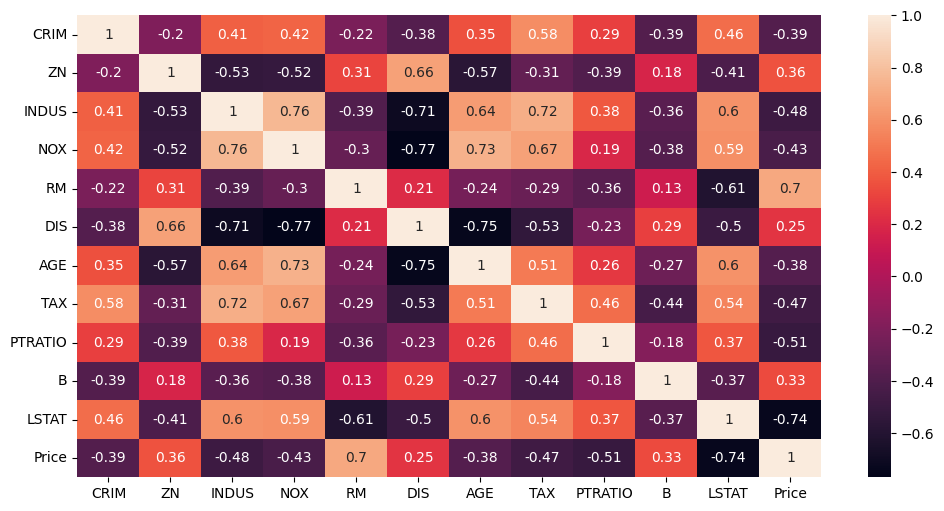

In [19]:
# Multivariate Analysis 
plt.figure(figsize=(12,6)) 
sns.heatmap(df[num_cols].corr(),annot=True) 
plt.show()

# Pre processing Steps //
# Dummy variable  creation (one hot encoding) //
# drop dummies more than 2 category

In [21]:
df[cat_cols].nunique()

CHAS    2
RAD     9
dtype: int64

In [22]:
dum=pd.get_dummies(df["RAD"],drop_first=True,dtype=int)
dum.shape

(506, 8)

In [23]:
df1=pd.concat([df,dum],axis=1)
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,Price,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,4.98,24.0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,9.14,21.6,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,4.03,34.7,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,2.94,33.4,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,5.33,36.2,0,1,0,0,0,0,0,0


In [24]:
df1=df1.drop(["RAD"],axis=1)

In [25]:
df1.shape

(506, 21)

In [26]:
df1.columns

Index([   'CRIM',      'ZN',   'INDUS',    'CHAS',     'NOX',      'RM',
           'AGE',     'DIS',     'TAX', 'PTRATIO',       'B',   'LSTAT',
         'Price',       2.0,       3.0,       4.0,       5.0,       6.0,
             7.0,       8.0,      24.0],
      dtype='object')

In [27]:
df1.columns = df1.columns.astype(str)

In [28]:
df1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '24.0'],
      dtype='object')

# Train Test Split

In [29]:
X = df1.drop(["Price"],axis=1)
y = df1["Price"]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)


In [31]:
print(X_train.shape)
print(X_test.shape)

(404, 20)
(102, 20)


# Scaling

In [32]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler() 
X_train=scaler.fit_transform(X_train) 
X_test=scaler.transform(X_test)# As test data is unseen data we can't fit on it

In [33]:
X_test

array([[-0.42553569,  2.98004576, -1.3851609 , ..., -0.19636805,
        -0.22215006, -0.58497238],
       [-0.37299822, -0.49577809, -0.70194846, ..., -0.19636805,
         4.50146175, -0.58497238],
       [-0.4245489 , -0.49577809,  0.13454882, ..., -0.19636805,
        -0.22215006, -0.58497238],
       ...,
       [ 0.2063882 , -0.49577809,  1.03527975, ..., -0.19636805,
        -0.22215006,  1.70948241],
       [-0.39261429, -0.49577809,  1.58856504, ..., -0.19636805,
        -0.22215006, -0.58497238],
       [ 0.52737117, -0.49577809,  1.03527975, ..., -0.19636805,
        -0.22215006,  1.70948241]])

In [34]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_test_df = pd.DataFrame(X_test,columns=X.columns)

In [36]:
X_train_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
0,1.892434,-0.495778,1.035280,-0.288288,1.019549,-0.074765,1.128863,-1.175156,1.543468,0.813975,0.387891,1.262678,-0.203069,-0.293294,-0.535373,-0.543021,-0.239983,-0.196368,-0.22215,1.709482
1,-0.327672,-0.495778,-0.161802,-0.288288,-0.077387,-0.218185,-0.552953,-0.561852,-0.600514,-0.039554,0.424998,-0.910043,-0.203069,-0.293294,1.867857,-0.543021,-0.239983,-0.196368,-0.22215,-0.584972


# Feature selection

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [38]:
estimator=LinearRegression() 
selector=RFE(estimator,n_features_to_select=8) #8-20 

In [39]:
selector=selector.fit(X_train_df,y_train) 
selector.support_ 

array([False,  True, False, False,  True,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False,  True])

In [40]:
selected_features=X_train_df.columns[selector.support_] 
print(selected_features)

Index(['ZN', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', '24.0'], dtype='object')


In [41]:
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

# Modelling

In [43]:
import statsmodels.api as sm

In [44]:
X_train_sm=sm.add_constant(X_train) # X_train_sm["const"] = 1
X_test_sm = sm.add_constant(X_test)

In [45]:
model1=sm.OLS(np.array(y_train),X_train_sm)  # Ordinary Least Squared
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          7.99e-102
Time:                        16:21:52   Log-Likelihood:                -1210.2
No. Observations:                 404   AIC:                             2438.
Df Residuals:                     395   BIC:                             2474.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6210      0.243     92.912      0.000      22.142      23.100
ZN             0.9510      0.357      2.661      0.008       0.248       1.654
NOX           -1.7966      0.472     -3.806      0.000      -2.725      -0.869
RM             2.5649      0.331      7.744      0.000       1.914       3.216
DIS           -2.9438      0.440     -6.689      0.000      -3.809      -2.079
TAX           -2.0034      0.627     -3.198      0.001      -3.235      -0.772
PTRATIO       -1.9939      0.321     -6.219      0.000      -2.624      -1.364
LSTAT         -4.1124      0.380    -10.812      0.000      -4.860      -3.365
24.0           1.8014      0.584      3.087      0.002       0.654       2.949
==============================================================================
Omnibus:                      139.674   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.273
Skew:                           1.480   Prob(JB):                    3.28e-125
Kurtosis:                       8.029   Cond. No.                         6.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Acceptable Range for p-value is < 0.05
# Acceptable Range for  VIF is < 5 

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,ZN,2.154506
2,NOX,3.758312
3,RM,1.850761
4,DIS,3.267930
5,TAX,6.622542
6,PTRATIO,1.734007
7,LSTAT,2.440413
8,24.0,5.744009


In [47]:
X_train_sm=X_train_sm.drop("TAX",axis=1)
X_test_sm=X_test_sm.drop("TAX",axis=1)

In [48]:
model2=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     134.9
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          1.00e-100
Time:                        17:05:42   Log-Likelihood:                -1215.4
No. Observations:                 404   AIC:                             2447.
Df Residuals:                     396   BIC:                             2479.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6210      0.246     91.849      0.000      22.137      23.105
ZN             0.7964      0.358      2.223      0.027       0.092       1.501
NOX           -2.1964      0.460     -4.771      0.000      -3.102      -1.291
RM             2.6747      0.333      8.026      0.000       2.019       3.330
DIS           -2.8618      0.444     -6.439      0.000      -3.736      -1.988
PTRATIO       -2.1447      0.321     -6.686      0.000      -2.775      -1.514
LSTAT         -4.1423      0.385    -10.770      0.000      -4.898      -3.386
24.0           0.3443      0.369      0.934      0.351      -0.381       1.069
==============================================================================
Omnibus:                      130.981   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.232
Skew:                           1.414   Prob(JB):                    3.53e-107
Kurtosis:                       7.596   Cond. No.                         4.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X_train_sm=X_train_sm.drop("24.0",axis=1)
X_test_sm=X_test_sm.drop("24.0",axis=1)

In [50]:
model3=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     157.3
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          1.18e-101
Time:                        17:08:01   Log-Likelihood:                -1215.8
No. Observations:                 404   AIC:                             2446.
Df Residuals:                     397   BIC:                             2474.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6210      0.246     91.864      0.000      22.137      23.105
ZN             0.8736      0.348      2.507      0.013       0.189       1.559
NOX           -2.0108      0.415     -4.843      0.000      -2.827      -1.195
RM             2.7214      0.329      8.261      0.000       2.074       3.369
DIS           -2.8917      0.443     -6.524      0.000      -3.763      -2.020
PTRATIO       -1.9969      0.279     -7.158      0.000      -2.545      -1.448
LSTAT         -4.0934      0.381    -10.744      0.000      -4.842      -3.344
==============================================================================
Omnibus:                      138.501   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.832
Skew:                           1.481   Prob(JB):                    6.65e-120
Kurtosis:                       7.882   Cond. No.                         4.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,ZN,2.002172
2,NOX,2.842837
3,RM,1.789621
4,DIS,3.239984
5,PTRATIO,1.283293
6,LSTAT,2.393720


In [ ]:
#price=0.8736*ZN-2.0108*NOX+2.7214*RM-2.8917*DIS-1.9969*PTRATIO+4.0934*LSTAT+22.6210

In [52]:
y_train_pred=res3.predict(X_train_sm)
y_test_pred=res3.predict(X_test_sm)

In [53]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,3),"Test:",round(r2_test,3))

Train: 0.704 Test: 0.733
